In [1]:
import pandas as pd

df = pd.read_excel(r"C:\Users\win10\Downloads\Bitcoin-news.xlsx")

print(df.head())

                                                guid  \
0  CBMizAFBVV95cUxPS2NTQ2tLeklYSTl6RUw2VlpJM0xxbW...   
1  CBMib0FVX3lxTE1SYUc3Z0RBWURBZ0pQMF9xeWRndkw1a0...   
2  CBMinAFBVV95cUxNb3diZlk5QWV5RHVubEllX2NzNUVlel...   
3  CBMiW0FVX3lxTE1uT000aldLeWstZkwzVC1hckhqZmZXV1...   
4  CBMiXkFVX3lxTE9yV2dVWExlMlA5NzNLTzFfQ1B3OHpfM2...   

                                               image  \
0  https://cdn.sanity.io/images/s3y3vcno/producti...   
1  https://www.investopedia.com/thmb/ISwayBla8HOg...   
2  https://assets.beincrypto.com/img/z1wv-qLMiw8n...   
3  https://www.chaincatcher.com/_nuxt/img/wx_icon...   
4  https://img.bgstatic.com/multiLang/web/3263b00...   

                                                link  \
0  https://www.coindesk.com/business/2025/09/20/k...   
1  https://www.investopedia.com/dow-jones-today-0...   
2  https://beincrypto.com/sec-commissioner-hester...   
3    https://www.chaincatcher.com/en/article/2207196   
4  https://www.bitget.com/news/detail/12560604

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

# Load your excel file
# The 'r' before the string is a good practice for file paths in Python
df = pd.read_excel(r"C:\Users\win10\Downloads\Bitcoin-news.xlsx")

# IMPORTANT: Make sure your text column is actually named 'text'.
# If it has a different name (e.g., 'Reviews'), change 'text' in the lines below.
# You can check the column names by running: print(df.columns)

# 1. Remove missing rows from the 'text' column
df.dropna(subset=['title'], inplace=True)

# 2. Tokenize the 'text' column
df['tokenized_title'] = df['title'].apply(word_tokenize)

# 3. Make every text in the 'text' column lower case
df['lowercase_title'] = df['title'].str.lower()

# 4. Remove special characters
df['no_special_chars_title'] = df['lowercase_title'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))

# 5. Remove stopwords
stop_words = set(stopwords.words('english'))
df['stopwords_removed_title'] = df['no_special_chars_title'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

print(df.head())

                                                guid  \
0  CBMizAFBVV95cUxPS2NTQ2tLeklYSTl6RUw2VlpJM0xxbW...   
1  CBMib0FVX3lxTE1SYUc3Z0RBWURBZ0pQMF9xeWRndkw1a0...   
2  CBMinAFBVV95cUxNb3diZlk5QWV5RHVubEllX2NzNUVlel...   
3  CBMiW0FVX3lxTE1uT000aldLeWstZkwzVC1hckhqZmZXV1...   
4  CBMiXkFVX3lxTE9yV2dVWExlMlA5NzNLTzFfQ1B3OHpfM2...   

                                               image  \
0  https://cdn.sanity.io/images/s3y3vcno/producti...   
1  https://www.investopedia.com/thmb/ISwayBla8HOg...   
2  https://assets.beincrypto.com/img/z1wv-qLMiw8n...   
3  https://www.chaincatcher.com/_nuxt/img/wx_icon...   
4  https://img.bgstatic.com/multiLang/web/3263b00...   

                                                link  \
0  https://www.coindesk.com/business/2025/09/20/k...   
1  https://www.investopedia.com/dow-jones-today-0...   
2  https://beincrypto.com/sec-commissioner-hester...   
3    https://www.chaincatcher.com/en/article/2207196   
4  https://www.bitget.com/news/detail/12560604

In [3]:
# Define the name for your new Excel file
output_filename = 'processed_bitcoin_news.xlsx'

# Save the DataFrame to an Excel file
# The index=False argument prevents pandas from writing the DataFrame index as a column in the Excel file.
df.to_excel(output_filename, index=False)

print(f"File has been saved successfully as '{output_filename}'")

File has been saved successfully as 'processed_bitcoin_news.xlsx'


In [5]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.Collecting textblob
  Using cached textblob-0.19.0-py3-none-any.whl.metadata (4.4 kB)
Using cached textblob-0.19.0-py3-none-any.whl (624 kB)



In [8]:
from textblob import TextBlob

# 1. Load your preprocessed Excel file
input_filename = 'processed_bitcoin_news.xlsx'
df = pd.read_excel(input_filename)

# Ensure the target column is treated as a string to avoid errors
df['stopwords_removed_title'] = df['stopwords_removed_title'].astype(str)

# 2. Define functions to get polarity and subjectivity
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# 3. Apply the functions to the 'stopwords_removed_text' column
df['polarity'] = df['stopwords_removed_title'].apply(get_polarity)
df['subjectivity'] = df['stopwords_removed_title'].apply(get_subjectivity)

# 4. Create a sentiment category column
def get_sentiment_category(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_category'] = df['polarity'].apply(get_sentiment_category)

# 5. Display the results
# We'll show the text column and the new sentiment columns
print(df[['stopwords_removed_title', 'polarity', 'subjectivity', 'sentiment_category']].head())

# Optional: Save the new DataFrame with sentiment scores to a new Excel file
df.to_excel('bitcoin_with_sentiment.xlsx', index=False)
print("\nSentiment analysis complete. Results saved to 'bitcoin_with_sentiment.xlsx")

                             stopwords_removed_title  polarity  subjectivity  \
0  kevin durant recovers bitcoin bought 650 17700...     0.100           0.4   
1  markets news sep 15 2025 nasdaq sp 500 close r...     0.000           0.0   
2  sec commissioner hester peirce rejects openvpp...    -0.100           0.6   
3  data current 8hour average funding rate btc ac...    -0.075           0.4   
4          btc price breakout could target 165k next     0.000           0.0   

  sentiment_category  
0           Positive  
1            Neutral  
2           Negative  
3           Negative  
4            Neutral  

Sentiment analysis complete. Results saved to 'bitcoin_with_sentiment.xlsx


In [10]:
pip install matplotlib

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 349.5 kB/s eta 0:00:22
   -- ------------------------------------- 0.5/8.1 MB 349.5 kB/s eta 0:00:22
   --- ------------------------------------ 0.8/8.1 MB 459.5 kB/s eta 0:00:16
   --- ------------------------------------ 0.8/8.1 MB 459.5 kB/s eta 0:00:1

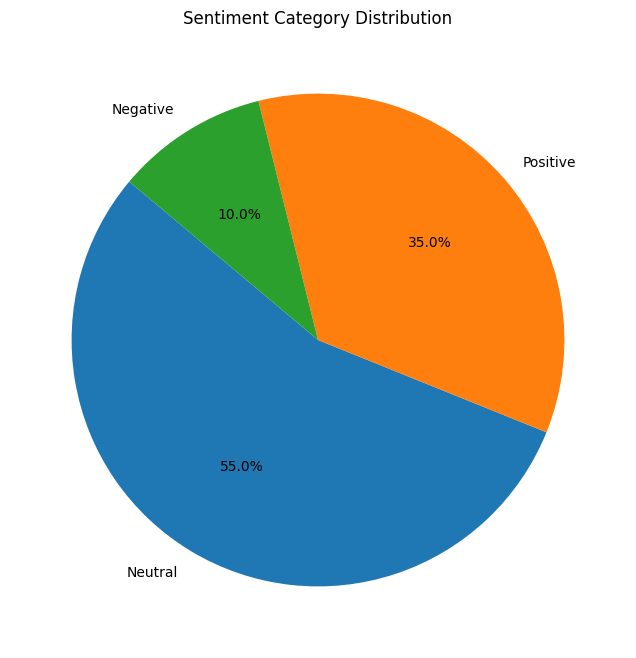

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from your Excel file
df = pd.read_excel('bitcoin_with_sentiment.xlsx')

# Count the occurrences of each sentiment category
sentiment_counts = df['sentiment_category'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Category Distribution')
plt.ylabel('')  # This hides the 'sentiment_category' label on the side

# Display the chart
plt.show()

In [13]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.Collecting scikit-learn
   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.9 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.9 MB 2.6 MB/s eta 0:00:04
   ----- ---------------------------------- 1.3/8.9 MB 2.5 MB/s eta 0:00:04
   ------- -------------------------------- 1.6/8.9 MB 2.2 MB/s eta 0:00:04
   -------- ------------------------------- 1.8/8.9 MB 2.1 MB/s eta 0:00:04
   ---------- ----------------------------- 2.4/8.9 MB 2.1 MB/s eta 0:00:04
   ----------- ---------------------------- 2.6/8.9 MB 2.1 MB/s eta 0:00:04
   ------------ --------------------------- 2.9/8.9 MB 2.0 MB/s eta 0:00:04
   -------------- ------------------------- 3.1/8.9 MB 1.9 MB/s eta 0:00:04
   --------------- ------------------------ 3.4/8.9 MB 1.8 MB/s eta 0:00:04
   ---------------- ----------------------- 3.7/8.9 MB 1.8 MB/s eta 0:00:03
   ----------

In [14]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# 1. Load your preprocessed data
df = pd.read_excel('bitcoin_with_sentiment.xlsx')

# Handle any potential empty rows after stopword removal
df['stopwords_removed_title'].fillna('', inplace=True)
documents = df['stopwords_removed_title']

# 2. Vectorize the text data using TF-IDF
# max_df=0.95 ignores terms that appear in more than 95% of the documents
# min_df=2 ignores terms that appear in less than 2 documents
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(documents)

# 3. Apply NMF to find 5 topics
num_topics = 5
nmf_model = NMF(n_components=num_topics, random_state=42)
nmf_model.fit(tfidf_matrix)

# 4. Display the topics with their top words
def display_topics(model, feature_names, num_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx + 1}:")
        top_words = [feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]
        print(" ".join(top_words))
        print("-" * 50)

# Get the feature names (words) from the vectorizer
feature_names = vectorizer.get_feature_names_out()
num_top_words = 10

print("Discovered Topics and their Top Words:\n")
display_topics(nmf_model, feature_names, num_top_words)

Discovered Topics and their Top Words:

Topic #1:
investment good 20252030 prediction price protocol ada 2030 eth ethereum
--------------------------------------------------
Topic #2:
crypto fraud regulatory takes market trading june business bought korean
--------------------------------------------------
Topic #3:
btc xrp eth breakout price doge mining bnb sol ada
--------------------------------------------------
Topic #4:
2025 price 2030 prediction forecast 2024 2023 xrp fetchai fet
--------------------------------------------------
Topic #5:
bitcoin new soars ethereum quantum michael best drops saylor blackrock
--------------------------------------------------


C:\Users\win10\AppData\Local\Temp\ipykernel_18216\1563005473.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['stopwords_removed_title'].fillna('', inplace=True)


C:\Users\win10\AppData\Local\Temp\ipykernel_18216\1236732289.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['stopwords_removed_title'].fillna('', inplace=True)


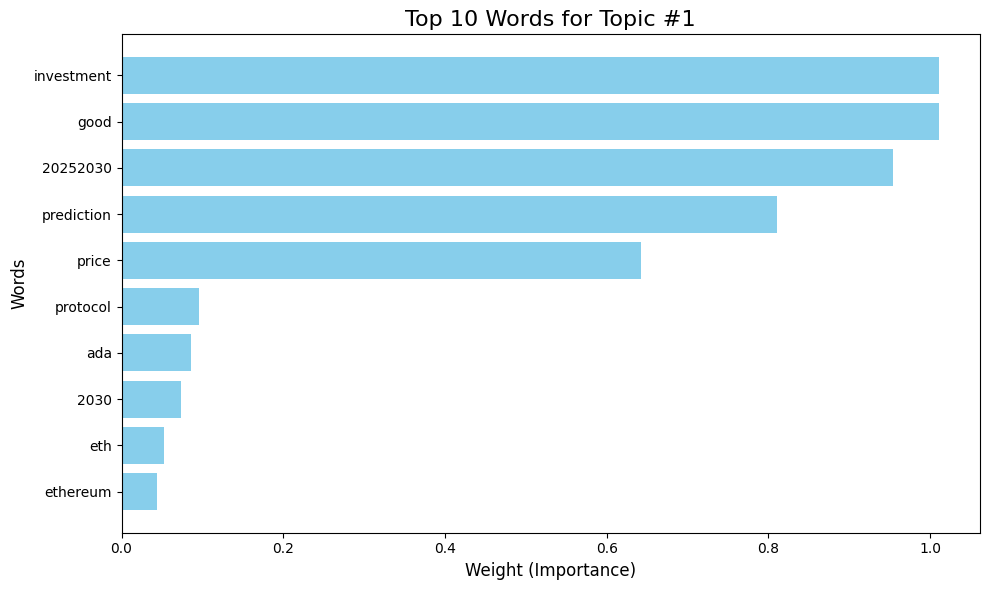

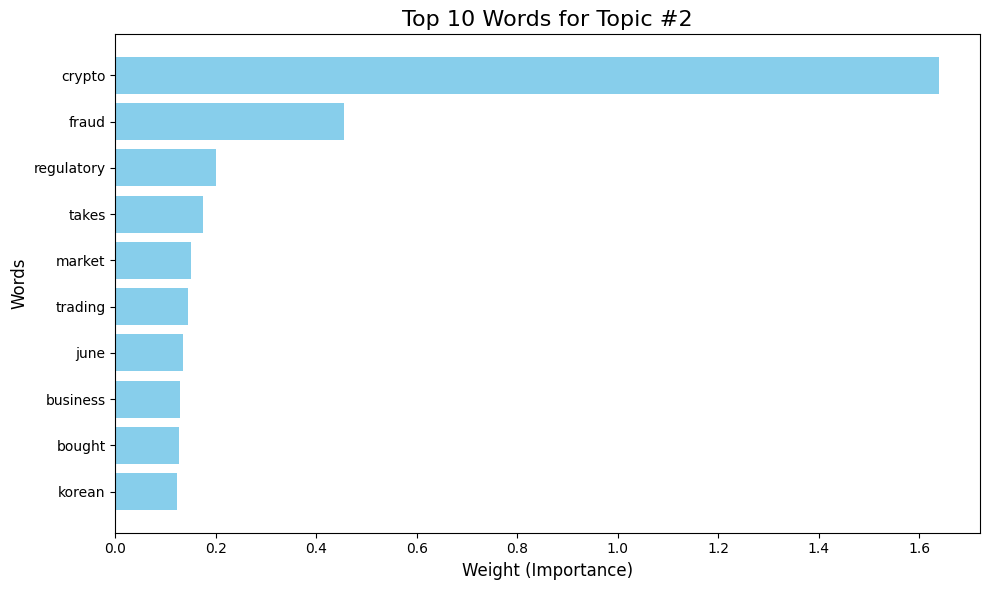

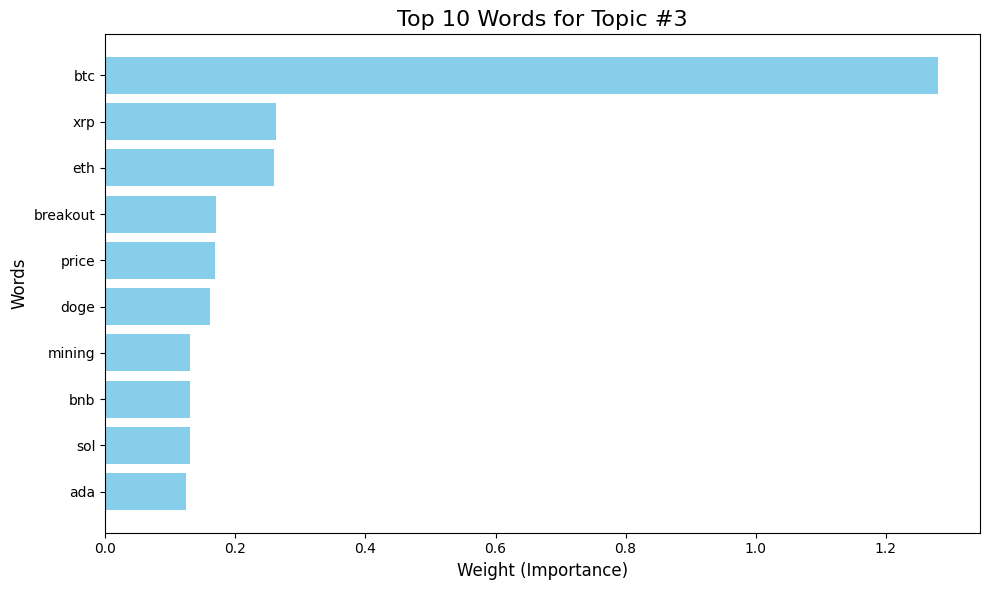

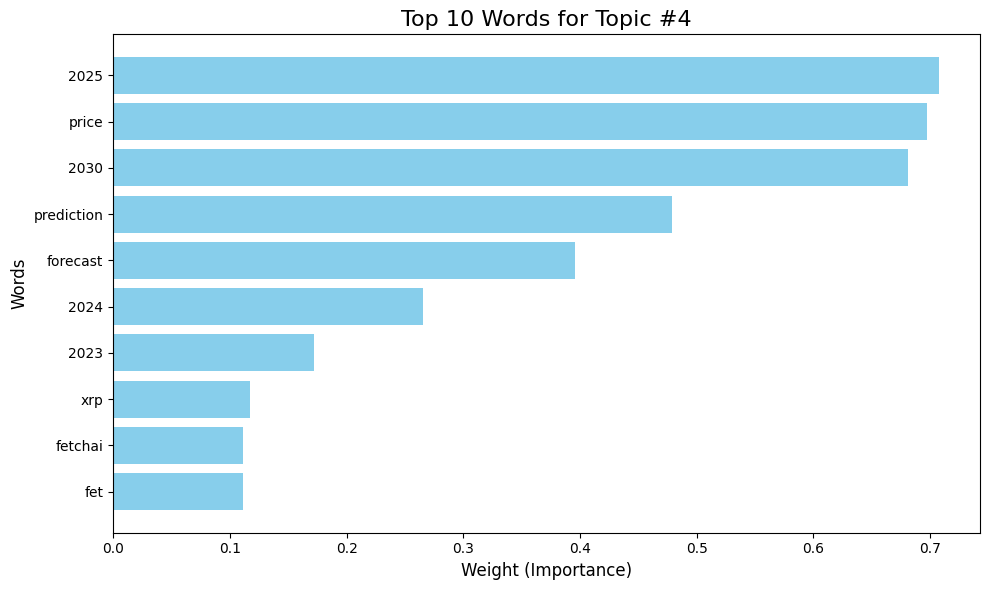

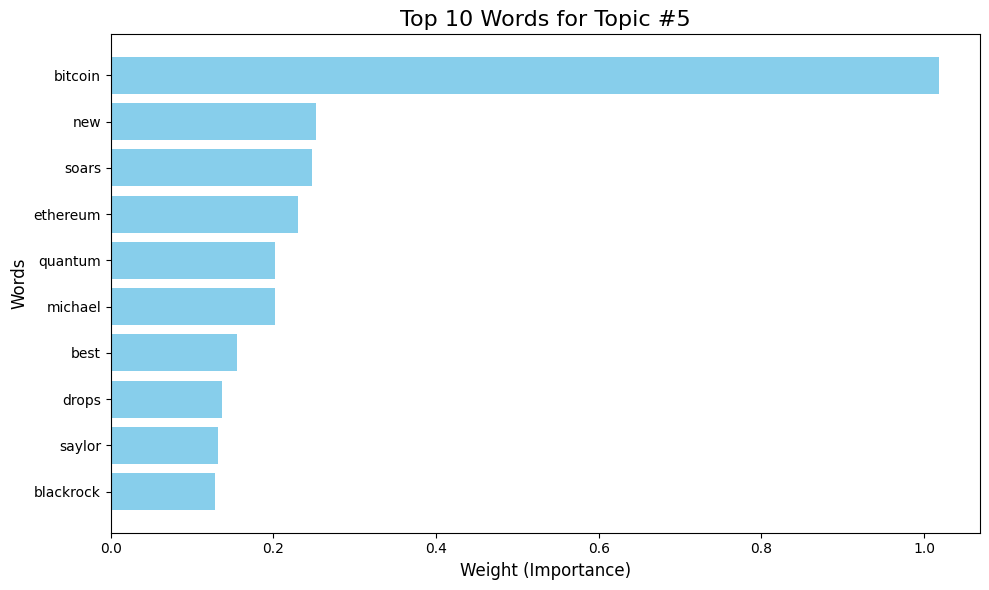

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# 1. Load your preprocessed data
df = pd.read_excel('bitcoin_with_sentiment.xlsx')

# Handle any potential empty rows after stopword removal
df['stopwords_removed_title'].fillna('', inplace=True)
documents = df['stopwords_removed_title']

# 2. Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(documents)

# 3. Apply NMF to find 5 topics
num_topics = 5
nmf_model = NMF(n_components=num_topics, random_state=42)
nmf_model.fit(tfidf_matrix)

# 4. Get the feature names (words) from the vectorizer
feature_names = vectorizer.get_feature_names_out()
num_top_words = 10

# 5. Loop through each topic to create and display a bar chart
for topic_idx, topic in enumerate(nmf_model.components_):
    # Get the top words and their weights for the current topic
    top_words_indices = topic.argsort()[:-num_top_words - 1:-1]
    top_words = [feature_names[i] for i in top_words_indices]
    top_weights = topic[top_words_indices]

    # Create the horizontal bar chart
    plt.figure(figsize=(10, 6))
    plt.barh(top_words, top_weights, color='skyblue')
    
    # Invert y-axis to have the most important word on top
    plt.gca().invert_yaxis()
    
    # Add titles and labels
    plt.title(f'Top {num_top_words} Words for Topic #{topic_idx + 1}', fontsize=16)
    plt.xlabel('Weight (Importance)', fontsize=12)
    plt.ylabel('Words', fontsize=12)
    
    # Ensure layout is tight and display the plot
    plt.tight_layout()
    plt.show()

In [17]:
pip install wordcloud

C:\Users\win10\AppData\Local\Temp\ipykernel_18216\4221015633.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['stopwords_removed_title'].fillna('', inplace=True)


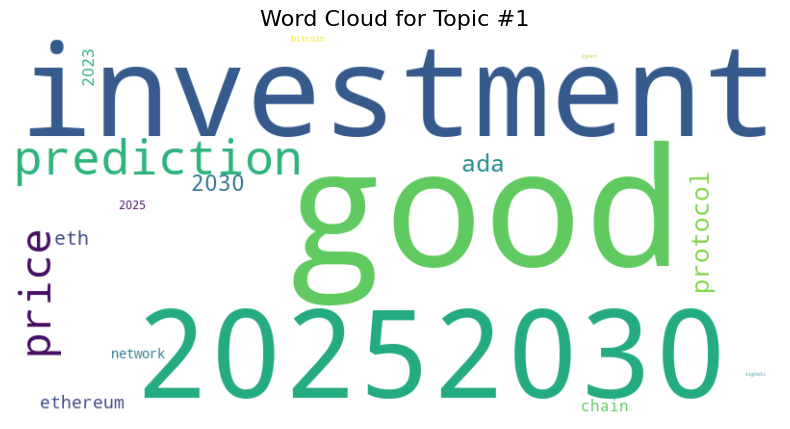

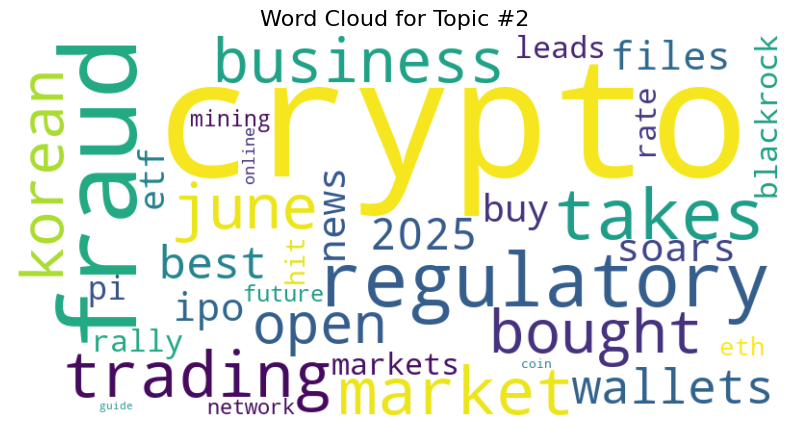

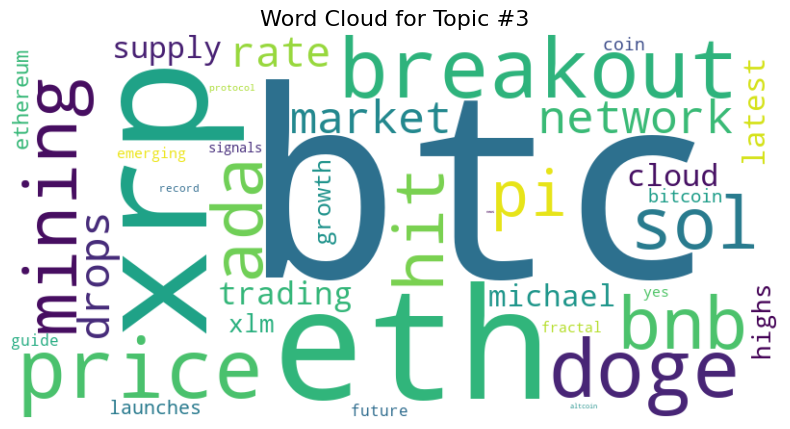

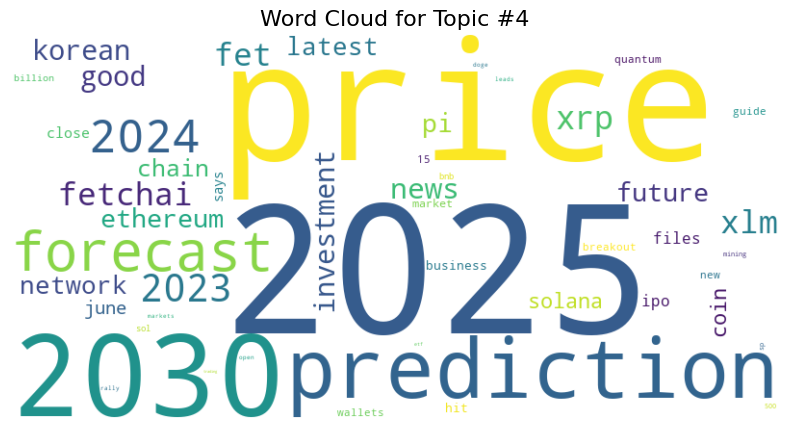

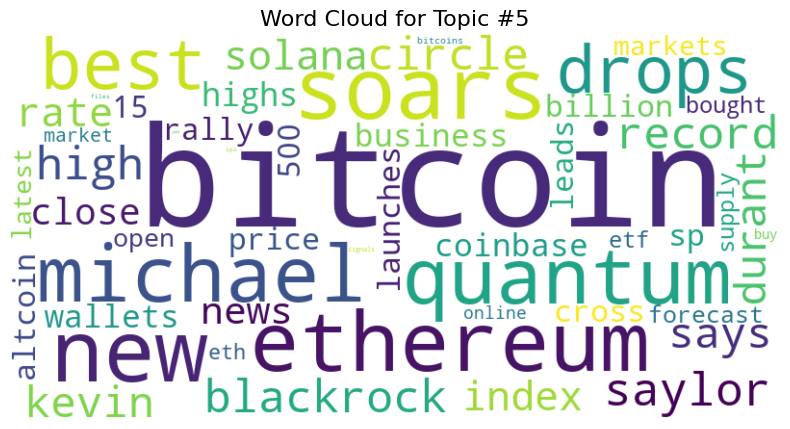

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from wordcloud import WordCloud

# 1. Load your preprocessed data
df = pd.read_excel('bitcoin_with_sentiment.xlsx')

# Handle any potential empty rows after stopword removal
df['stopwords_removed_title'].fillna('', inplace=True)
documents = df['stopwords_removed_title']

# 2. Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(documents)

# 3. Apply NMF to find 5 topics
num_topics = 5
nmf_model = NMF(n_components=num_topics, random_state=42)
nmf_model.fit(tfidf_matrix)

# 4. Get the feature names (words) from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# 5. Loop through each topic to generate and display a word cloud
for topic_idx, topic in enumerate(nmf_model.components_):
    # Create a dictionary of words and their weights for the current topic
    topic_words = {feature_names[i]: topic[i] for i in topic.argsort()}
    
    # Create the WordCloud object
    wordcloud = WordCloud(
        width=800, 
        height=400, 
        background_color='white'
    ).generate_from_frequencies(topic_words)
    
    # Display the generated image
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Topic #{topic_idx + 1}', fontsize=16)
    plt.axis('off') # Hide the axes
    plt.show()

In [19]:
from nltk.util import ngrams
from collections import Counter
import re

# 1. Load your data
df = pd.read_excel('bitcoin_with_sentiment.xlsx')

# 2. Prepare the text
# Ensure the column is string type and handle any potential empty cells
df['stopwords_removed_title'].fillna('', inplace=True)

# Combine all text into one large list of words
# .split() will separate words based on spaces
all_words = [word for text in df['stopwords_removed_title'] for word in text.split()]

# --- Bigram Analysis ---

# 3. Generate and count bigrams
bigrams = ngrams(all_words, 2)
bigram_counts = Counter(bigrams)

# 4. Format and display the most common bigrams
# We join the tuple of words back into a string for readability
most_common_bigrams = [(' '.join(gram), count) for gram, count in bigram_counts.most_common(20)]
bigram_df = pd.DataFrame(most_common_bigrams, columns=['Bigram', 'Frequency'])

print("--- Top 20 Most Common Bigrams ---")
print(bigram_df)
print("\n" + "="*40 + "\n")


# --- Trigram Analysis ---

# 5. Generate and count trigrams
trigrams = ngrams(all_words, 3)
trigram_counts = Counter(trigrams)

# 6. Format and display the most common trigrams
most_common_trigrams = [(' '.join(gram), count) for gram, count in trigram_counts.most_common(20)]
trigram_df = pd.DataFrame(most_common_trigrams, columns=['Trigram', 'Frequency'])

print("--- Top 20 Most Common Trigrams ---")
print(trigram_df)

--- Top 20 Most Common Bigrams ---
                 Bigram  Frequency
0      price prediction         24
1       good investment         16
2   prediction 20252030         11
3             2025 2030         11
4       prediction 2025          8
5        price forecast          4
6               btc eth          3
7         bitcoin price          3
8             xrp price          3
9               pi coin          3
10      prediction 2024          3
11            2024 2025          3
12         kevin durant          2
13               sp 500          2
14            btc price          2
15              eth xrp          2
16              xrp bnb          2
17              bnb sol          2
18         cloud mining          2
19       crypto wallets          2


--- Top 20 Most Common Trigrams ---
                      Trigram  Frequency
0   price prediction 20252030         11
1       price prediction 2025          8
2        prediction 2025 2030          8
3       price prediction 202

C:\Users\win10\AppData\Local\Temp\ipykernel_18216\439328943.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['stopwords_removed_title'].fillna('', inplace=True)
